<h1> Introductory Econometrics in Python

**Table of Content**
- Simple Regression with Cross-sectional Data
- ***Multiple Regression with cross-sectioal Data, including Inference and Hypothesis testing***
- Binary Dependent Variables
- Regression Analysis with Panel Data
- Estimation of Treatment Effects: Difference-in-difference Analysis 

**Multiple Regression with cross-sectional data**
1. Basic Concept
2. Some notion on low R2
3. Perfect Collinearity
4. Endogeneous and exogeneous variables (e.g., Omitted Variable Bias)
5. Potential Outcomes, Treatment Effects, and Policy
6. Inference
7. Further Issues: specification, functional forms, data problems
8. Predictions
9. Multiple Regressions with qualitative variables

## Multiple Regression Analysis ##

### Multiple Regression Analysis: Estimation

- SLR.4 was: $E(u|x)=0$
- But: often not the case (or at least unclear) that all other factors affecting $y$ are uncorrelated with $x$
- Multiple regression analysis is more amenable to **ceteris paribus** analysis because it allows us to explicitly control for many other factors that simultaneously affect the dependent variable.
- Important both for testing economic theories and for evaluating policy effects when we must rely on nonexperimental data.
- Multiple regression models can accommodate many explanatory variables that may be correlated

    $\Rightarrow$ we can hope to infer causality in cases where simple regression analysis would be misleading.

**Multiple Regression Analysis: Estimation**

- Naturally: 
adding more factors that are useful for explaining $y$ to the model $\rightarrow$ more of the variation in $y$ explained.
- Thus: multiple regression analysis can be used to build better models for predicting the dependent variable.
- Additional advantage of multiple regression analysis: fairly general functional form relationships can be incorporated.
    - In the simple regression model, only one function of a single explanatory variable can appear in the equation:
    - Multiple regression model allows for much more flexibility.

**Multiple Regression Analysis**

- We begin with some simple examples to show how multiple regression analysis can be used to solve problems that cannot be solved by simple regression.
- The first example is a simple variation of the wage equation  for obtaining the effect of education on hourly wage but additionally include years of labor market experience _exper_:

\begin{equation*}
wage=\beta_0+\beta_1educ+\beta_2exper+u
\end{equation*}

- Thus:
    - wage is determined by the two explanatory or independent variables, education and experience,
    - and by other unobserved factors, which are contained in $u$.
    
- We are still primarily interested in the effect of _educ_ on _wage_, holding fixed all other factors affecting _wage_, that is, we are interested in the parameter $\beta_1$.
- _exper_ is now taken out of the error term and put explicitly in the equation
- Because exper appears in the equation, its coefficient, $\beta_2$, measures the ceteris paribus effect of _exper_ on _wage_, which is also of some interest.
- Allows us to measure the effect of education on wage, holding experience fixed.
- In a simple regression analysis—which puts _exper_ in the error term—we would have to assume that experience is  uncorrelated with education, a tenuous assumption.


**Multiple Regression Analysis**

- Multiple regression analysis is also useful for generalizing functional relationships between variables.
- As an example, suppose family consumption (_cons_) is a quadratic function of family income (_inc_)

\begin{equation*}
cons=\beta_0+\beta_1inc+\beta_2inc^2+u
\end{equation*}

- In a model with $n$ variables the key assumption about how $u$ is related to $x_1$ and $x_2$ is

\begin{equation*}
E(u|x_1,x_2)=0
\end{equation*}

- For the _wage_ equation this implies that other factors affecting _wage_ are not related on average to _educ_ and _exper_
- If we think innate ability is part of $u$, then we will need average ability levels to be the same across all combinations of education and experience in the working population.
- This may or may not be true, but, as we will later, this is the question we need to ask in order to determine whether the method of ordinary least squares produces unbiased estimators.


**Multiple Regression Analysis**

- The general multiple linear regression (MLR) model can be written in the population as

\begin{equation*}
y=\beta_0+\beta_1x_1+\beta_2x_2+...+\beta_kx_k+u
\end{equation*}

- In _Python_ it is estimated

```python
reg = smf.ols(formula='y ~ xl + x2 + x3', data=sample)
results = reg.fit()
```

- The constant is again added automatically
- `smf.ols` creates an object which contains all relevant information and `fit` performes the estimation.
- The estimation results are stored in a variable `results` using the code`results = reg.fit()`.
- We can use this variable for further analyses.
- For a typical regression output including a coefficient table, call `results.summary()`.

**Example: Hourly Wage Equation**


- Using the 526 observations on workers in WAGE1, we include _educ_ (years of education), _exper_ (years of labor market experience), and _tenure_ (years with the current employer) in an equation explaining _log(wage)_.
- The estimated equation is  


\begin{equation*}
\hat{log(wage)}=0.284+0.092 educ+0.0041 exper + 0.022 tenure
\end{equation*}

- As in the simple regression case, the coefficients have a percentage interpretation.
- The only difference here is that they also have a ceteris paribus interpretation.
- The coefficient .092 means that, holding _exper_ and _tenure_ fixed, another year of education is predicted to increase _log(wage)_ by .092, which translates into an approximate 9.2% increase in wage.
- Alternatively, if we take two people with the same levels of experience and job tenure, the coefficient on _educ_ is the proportionate difference in predicted wage when their education levels differ by one year.
- This measure of the return to education at least keeps two important productivity factors fixed; whether it is a good estimate of the ceteris paribus return to another year of education requires us to study the statistical properties of
OLS (later).

In [36]:
import wooldridge as woo
import numpy as np
import statsmodels.formula.api as smf
#from scipy import stats

wage1 = woo.dataWoo('wage1')

reg = smf.ols(formula='np.log(wage) ~ educ + exper + tenure  ', data=wage1)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

#stats.describe(wage1.tenure)

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     80.39
Date:                Tue, 14 Sep 2021   Prob (F-statistic):           9.13e-43
Time:                        10:18:07   Log-Likelihood:                -313.55
No. Observations:                 526   AIC:                             635.1
Df Residuals:                     522   BIC:                             652.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2844      0.104

**Example: Explaining Arrest Records**

- CRIME1 contains data on arrests during the year 1986 and other information on 2,725 men born in either 1960 or 1961 in California.
- Each man in the sample was arrested at least once prior to 1986.
    - The variable _narr86_ is the number of times the man was arrested during 1986: it is zero for most men in the sample (72.29%), and it varies from 0 to 12. (The percentage of men arrested once during 1986 was 20.51.)
    - The variable _pcnv_ is the proportion (not percentage) of arrests prior to 1986 that led
to conviction,
    - _avgsen_ is average sentence length served for prior convictions (zero for most people),
    - _ptime86_ is months spent in prison in 1986,
    - and _qemp86_ is the number of quarters during which the man was employed in 1986 (from zero to four).  
    
A linear model explaining arrests is

\begin{equation*}
narr96=\beta_0+\beta_1pcnv+\beta_2avgsen+\beta_3ptime86+\beta_4qemp86+u
\end{equation*}


where
- _pcnv_ is a proxy for the likelihood for being convicted of a crime
- and _avgsen_ is a measure of expected severity of punishment, if convicted.
- _ptime86_ captures the incarcerative effects of crime: if an individual is in prison, he cannot be arrested for a crime outside of prison.
- Labor market opportunities are crudely captured by _qemp86_.  


First, we estimate the model without the variable _avgsen_. We obtain  



In [83]:
import wooldridge as woo
import statsmodels.formula.api as smf

crime1 = woo.dataWoo('crime1')

# model without avgsen:
reg = smf.ols(formula='narr86 ~ pcnv + ptime86 + qemp86', data=crime1)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                 narr86   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     39.10
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           9.91e-25
Time:                        13:39:04   Log-Likelihood:                -3394.7
No. Observations:                2725   AIC:                             6797.
Df Residuals:                    2721   BIC:                             6821.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7118      0.033

\begin{equation*}
\hat{narr86}=0.712-0.150 pcnv-0.034 ptime86-0.104 qemp86
\end{equation*}

\begin{equation*}
n=2,725, R^2=0.0413
\end{equation*}


- This equation says that, as a group, the three variables _pcnv, ptime86_, and _qemp86_ explain about 4.1% of the variation in narr86.
- Each of the OLS slope coefficients has the anticipated sign:
    - increase in the proportion of convictions lowers the predicted number of arrests.
    - If we increase pcnv by .50 (a large increase in the probability of conviction), then, holding the other factors fixed, $\Delta\hat{narr86}=-0.15\cdot0.5=-0.75$  


- For example, among 100 men, the predicted fall in arrests when _pcnv_ increases by .50 is 0.75.
- Similarly, a longer prison term leads to a lower predicted number of arrests.
- In fact, if _ptime86_ increases from 0 to 12, predicted arrests for a particular man fall by $0.0341122\cdot12=0.408$.
- Another quarter in which legal employment is reported lowers predicted arrests by .104, which would be 10.4 arrests among 100 men.


Now let us add _avgsen_ to the model.

In [84]:
import wooldridge as woo
import statsmodels.formula.api as smf

crime1 = woo.dataWoo('crime1')

# model with avgsen:
reg = smf.ols(formula='narr86 ~ pcnv + avgsen + ptime86 + qemp86', data=crime1)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                 narr86   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     29.96
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           2.01e-24
Time:                        13:39:05   Log-Likelihood:                -3393.5
No. Observations:                2725   AIC:                             6797.
Df Residuals:                    2720   BIC:                             6826.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7068      0.033

If _avgsen_ is added to the model, we know that $R^2$ will increase. The estimated equation is 

\begin{equation*}
\hat{narr86}=0.707-0.151 pcnv-0.037 ptime86-0.103 qemp86
\end{equation*}

\begin{equation*}
n=2,725, R^2=0.0422
\end{equation*}

- Thus, adding the average sentence variable increases $R^2$ from .0413 to .0422, a practically small effect.
- The sign of the coefficient on _avgsen_ is also unexpected: it says that a longer average sentence length increases criminal activity.

**Some notion on the low $R^2$:**
    
- The fact that the four explanatory variables included
in the second regression explain only about 4.2% of the variation in narr86 does not necessarily
mean that the equation is useless.
- Even though these variables collectively do not explain much of the variation in arrests, it is still possible that the OLS estimates are reliable estimates of the ceteris paribus effects of each independent variable on narr86.
- As we will see, whether this is the case does not directly depend on the size of $R^2$.
- Generally, a low $R^2$ indicates that it is hard to predict individual outcomes on $y$ with much accuracy, something we study in more detail later.
- In the arrest example, the small $R^2$ reflects what we already suspect in the social sciences: it is generally very difficult to predict individual behavior.


**Some notion on the low $R^2$:**
    
- Also, the $R^2$ has the property that is increasing whenever new variables are added to the model.
- This does not mean that our model really gets better by adding everything to it.
- Because of this, there is also an adjusted version of the $R^2$ which takes the reduction in degrees of freedom into account, i.e. punishes the addition of new variables.

- The Adjusted $R^2$ is routinely reported by most statistical software packages.
- Moreover, you can only compare the $R^2$ for models based on the same set of observations.
- When you add a variable which has missings for some observations the comparison of $R^2$ becomes obsolete.

**Perfect collinearity:**

- Assumption SLR.3 (sample variation in the explanatory variable) has to be extended in the multiple linear regression case.
- The assumption is now that in the sample, 

    1. none of the independent variables is constant, 
    
    AND
    2. there are no exact linear relationships among the independent variables.
    
- Note: this does not exclude correlation between variables in general, they are most often correlated!
- Perfect collinearity can arise due to many reasons:
    - Obvious: two independent variables can be perfectly correlated when one variable is a constant multiple of another: 
        - a researcher inadvertently puts the same variable measured in different units into a regression equation (e.g. in \\$ or k \\$)
        - What sense would it make to hold income measured in dollars fixed while changing income measured in thousands of dollars?

**Perfect collinearity:**


- Perfect collinearity can also arise due to more subtle reasons:    
    -  in the case of adding a squared term of a variable but using logs
    - why would this be a problem?
       

**Perfect collinearity:**



- Because $log(cons)=\beta_0+\beta_1log(inc)+\beta2log(inc^2)+u$
- As $log(inc^2)=2 log(inc)$ this is a linear combination

Or another example:
- For example, suppose we want to estimate the effect of campaign spending on campaign outcomes.
- Assume that each election has two candidates and let _voteA_ be the percentage of the vote for Candidate A, and _expendA_ be campaign expenditures by Candidate A, let _expendB_ be campaign expenditures by Candidate B, and let _totexpend_ be total campaign expenditures
          
\begin{equation*}
voteA=\beta_0+\beta_1expendA+\beta_2expendB+\beta_3totalexpend+u
\end{equation*}

What would be the problem here? How would you interpret this equation in a ceteris paribus fashion?

**Perfect collinearity:**

- Trying to interpret this equation in a ceteris paribus fashion reveals the problem: The parameter of $\beta_1$ is supposed to measure the effect of increasing expenditures by Candidate A by one dollar on Candidate A’s vote, holding Candidate B’s spending and total spending fixed.
- This is nonsense, because if expendB and totexpend are held fixed, then we cannot increase expendA.

__Perfect collinearity__

- What is the problem here?

$log(wage)=\beta_0+\beta_1log(education)+\beta2log(exper)+\beta_3log(exper\cdot educ)$
   

**Multiple Regression Analysis**

- The **Zero conditional mean** assumption is similar as before
- The error $u$ has an expected of zero given any values of the independent variables:

\begin{equation*}
E(u|x_1,x_2,...,x_k)=0
\end{equation*}

- This assumption can fail if the functional relationship between the explained and explanatory variables is misspecified, for example (e.g. it's quadratic but we don't include a squared term)
- Another functional form misspecification occurs when we use the level of a variable when the log of the variable is what actually shows up in the population model, or vice versa (e.g. the true model has log(wage) as the dependent variable but we use wage as the dependent variable in our regression analysis)
- Then the estimators will be **biased**.



**Multiple Regression Analysis**

- Probably most important: Omitting an important factor that is correlated with any of $x_1, x_2, . . . , x_k$ causes  the zero conditional mean assumption to fail also.
- With multiple regression analysis, we are able to include many factors among the explanatory variables, and omitted variables are less likely to be a problem in multiple regression analysis than in simple regression analysis.
- Nevertheless, in any application, there are always factors that, due to data limitations or ignorance, we will not be able to include.
- If we think these factors should be controlled for and they are correlated with one or more of the independent variables, then the zero conditional mean assumption will be violated.
- We will derive this bias later and discuss potential solutions to overcome it.

**Multiple Regression Analysis**

- There are other ways how $u$ can be correlated with an explanatory variable, which we will discuss later.
- When the zero conditional mean assumption holds, we often say that we have **exogenous explanatory variables**.
- If $x_j$ is correlated with $u$ for any reason, then $x_j$ is said to be an **endogenous explanatory variable**.
- The zero conditional mean assumption resricts the relationship between the unobserved factors in $ $and the explanatory variables but unfortunately, we will never know for sure whether the average value of the unobserved factors is unrelated to the explanatory variables.
- But this is the critical assumption! We will see how to deal with it later.


**Omitted Variable Bias**

- Two special cases exist in which the simple regression of $y$ on $x_1$ will produce the same OLS estimate on $x_1$ as the regression of $y$ on $x_1$ and $x_2$.
    - write the simple regression of $y$ on $x_1$ as $\tilde{y}=\tilde{\beta}_0+\tilde{\beta}_1x_1$ and
    - write the multiple regression as $\hat{y}=\hat{\beta}_0+\hat{\beta}_1x_1+\hat{\beta_2}x_2$

- We know that in the simple regression coefficient $\tilde{\beta}_1$  does not usually equal the multiple regression coefficient $\hat{\beta}_1$
- It turns out there is a simple relationship between $\tilde{\beta}_1$ and $\hat{\beta}_1$, which allows for interesting comparisons between simple and multiple regression:

\begin{equation*}
\tilde{\beta}_1=\hat{\beta}_1+\hat{\beta}_2\tilde{\delta}_1
\end{equation*}

where $\tilde{\delta}_1$ is the slope coefficient from the simple regression of $x_2$ on $x_1$, $i=1, . . . , n$.
- The confounding term is the partial effect of $x_2$ on $\hat{y}$ times the slope in the simple regression of $x_2$ on $x_1$.
- Thus, the bias of $\tilde{\beta}_1$ is of the magnitude $\hat{\beta}_2\tilde{\delta}_1$
-  The relationship between $\tilde{\beta}_1$ and $\hat{\beta}_1$ also shows there are two distinct cases where they are equal:

    - The partial effect of $x_2$ on $\hat{y}$ is zero in the sample ($\hat{\beta}_2=0$)
    - $x_1$ and $x_2$ are uncorrelated in the sample ($\tilde{\delta}_1=0$)
- If none of these two cases applies there is a so called **omitted variable bias**.

**Omitted Variable Bias**

- Sometimes we know (at least) the direction of the bias.

|Sign of omitted parameter $\beta_2$| Corr($x_1,x_2)>0$ | Corr($x_1,x_2)<0$ |
|---| :--- | :--- |
|$\beta_2>0$|  Positive bias | Negative bias |
|$\beta_2<0$| Negative bias | Positive bias |

- Suppose we are interested in the effect of education on wages again and the true model is

\begin{equation*}
wage=\beta_0+\beta_1educ+\beta_2abil+u
\end{equation*}

- Because we do not observe ability,  we estimate

\begin{equation*}
wage=\beta_0+\beta_1educ+v
\end{equation*}

where $v=\beta_2abil+u$

- What is the direction of the bias?

- So even if don't observe ability we know how it affects our estimates.
- But we observe experience. What direction is the bias if we do not include experience?

In [16]:
import wooldridge as woo
import numpy as np
import statsmodels.formula.api as smf

wage1 = woo.dataWoo('wage1')

reg = smf.ols(formula='np.log(wage) ~ educ+ exper ', data=wage1)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     86.86
Date:                Sat, 11 Sep 2021   Prob (F-statistic):           2.68e-33
Time:                        20:33:37   Log-Likelihood:                -338.01
No. Observations:                 526   AIC:                             682.0
Df Residuals:                     523   BIC:                             694.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2169      0.109

**Omitted Variable Bias**

As a second example:
- suppose that, at the elementary school level, the average score for students on a standardized exam is determined by

\begin{equation*}
avgscore=\beta_0+\beta_1expend+\beta_2povrate+u
\end{equation*}

where _expend_ is expenditure per student and _povrate_ is the poverty rate of the children in the school.
- Using school district data, we only have observations on the percentage of students with a passing grade and per-student expenditures; we do not have information on poverty rates.
- Thus, we estimate $\beta_1$ from the simple regression of _avgscore_ on _expend_.

- We can again obtain the likely bias in $\tilde{\beta}_1$
- What do you think the bias will look like?

**Omitted Variable Bias**

- First, $\beta_2$ is probably negative: there is ample evidence
that children living in poverty score lower, on average, on standardized tests.
- Second, the average expenditure per student is probably negatively correlated with the poverty rate: the higher the poverty rate, the lower the average per-student spending, so that $Corr(x_1,x_2)>0$.
- Thus, $\tilde{\beta}_1$ will have a positive bias.
- This observation has important implications:
    - It could be that the true effect of spending is zero; that is, $\beta_1=0$.
    - However, the simple regression estimate of $\tilde{\beta_1}$ will be greater than zero, and this could lead us to conclude that expenditures are important when they are not.


**Omitted Variable Bias**

- When reading and performing empirical work in economics, it is important to master the terminology associated with biased estimators
- In the context of omitting a variable , if $E(\tilde{\beta}_1>\beta_1$), then we say that $\tilde{\beta}_1$ has an **upward bias**
- In the opposite case we call it a **downward bias**
- The phrase **biased toward zero** refers to cases where $E(\tilde{\beta}_1)$ is closer to zero than is $\beta_1$. 


**Omitted Variable Bias**

- Deriving the sign of omitted variable bias when there are multiple regressors in the estimated model is more difficult.
- We must remember that correlation between a single explanatory variable and the error generally results in all OLS estimators being biased.
- For example, suppose the population model

\begin{equation*}
y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3
\end{equation*}

- We omit $x_3$ and estimate the model
- Now, suppose that $x_2$ and $x_3$ are uncorrelated, but $x_1$ is correlated with $x_3$.
- In other words, $x_1$ is correlated with the omitted variable, but $x_2$ is not.
- It is tempting to think that, while $\beta_1$ is probably biased based on the derivation in the previous subsection, $\beta_2$ is unbiased because $x_2$ is uncorrelated with $x_3$.
- Unfortunately, this is not generally the case: $\beta_1$ and $\beta_2$ will normally be biased.
- The only exception to this is when $x_1$ and $x_2$ are also uncorrelated.
- For instance, in the example


\begin{equation*}
y=\beta_0+\beta_1educ+\beta_2exper+\beta_3abil+u
\end{equation*}

both, $\beta_1$ and$\beta_2$ will be biased if we omitt $abil$, even if $exper$ is uncorrelated with $abil$

**Simulating Omitted Variable Bias**

- Consider a model $y=\beta_0+\beta_{1}x_1+\beta_{2}x_2+u$ 
- Assume there is a common component $r$ affecting $x_1$ and $x_2$ 
- Assume $\beta_0$ = 1, $\beta_1$=-0.3 and $\beta_2$=0.7

In [24]:
# generate some random variables with the above characteristics
import pandas as pd
import numpy as np
from numpy.random import seed
from numpy.random import rand
from numpy.random import randn

# generate a random common component for x1 and x2
# seed random number generator
seed(167765433)
r = randn(100000)
r[:10]


array([ 1.77372292,  0.34481981, -1.14562961,  0.71533561,  0.13235647,
       -0.18533965, -0.19659412,  0.41682005,  0.89778896,  0.78966118])

In [25]:
from scipy import stats
stats.describe(r)

DescribeResult(nobs=100000, minmax=(-4.312902329603882, 4.258398185972333), mean=-0.0012581912394731525, variance=1.0000838718581773, skewness=-0.0014510567073173907, kurtosis=-0.002054989955218467)

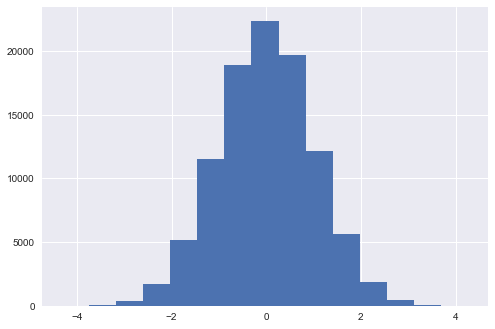

In [27]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
count, bins, ignored = plt.hist(r, 15, density=True)
plt.show()

In [30]:
# generate x1 and x2
seed(1)
x1 = randn(100000)+r
x2 = randn(100000)-3+r

# generate random error
e = randn(100000)

# generate y
y = 1 - 0.3*x1 + 0.7*x2 + e

# generate dataframe
df = pd.DataFrame({'Y' : y, 'X1': x1, 'X2':x2,'e':e})
df.head()

,Y,X1,X2,e
0,-3.240638,3.398068,-3.478395,-0.786340
1,1.808476,-0.266937,-2.049493,2.163040
2,-1.300795,-1.673801,-2.962245,-0.729364
3,1.257625,-0.357633,-1.955675,1.519308
4,-1.773668,0.997764,-2.803746,-0.511717


In [31]:
df.describe()

,Y,X1,X2,e
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,-1.101529,0.003995,-2.997574,-0.002028
std,1.321183,1.409322,1.412244,1.002965
min,-6.476633,-6.468601,-9.589595,-4.197432
25%,-1.998156,-0.941525,-3.954581,-0.675182
50%,-1.107798,0.006621,-2.992871,-0.006408
75%,-0.210972,0.957663,-2.043472,0.673711
max,4.366939,6.223094,3.203332,4.530903


We first estimate the unbiased model $\hat{y}=\hat{\beta}_0+\hat{\beta}_1x_1+\hat{\beta}_2x_2+\hat{u}$

In [24]:
# estimate unbiased OLS model
import statsmodels.formula.api as smf    # for the ols and robust ols model
import statsmodels.api as sm

formula = "y ~ x1 + x2 "
results = smf.ols(formula, df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                 2.454e+04
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:49:05   Log-Likelihood:            -1.4219e+05
No. Observations:              100000   AIC:                         2.844e+05
Df Residuals:                   99997   BIC:                         2.844e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9940      0.010     98.945      0.0

Now we assume we don't observe $x_2$ and instead estimate

\begin{equation*}
\tilde{y}=\tilde{\beta}_0+\tilde{\beta}_1x_1
\end{equation*}

In [25]:
formula = "y ~ x1"
results = smf.ols(formula, df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     575.3
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          9.03e-127
Time:                        16:49:05   Log-Likelihood:            -1.6187e+05
No. Observations:              100000   AIC:                         3.237e+05
Df Residuals:                   99998   BIC:                         3.238e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0994      0.004   -284.705      0.0

Let's now compare the two regression
   - the one where we omit $x_2$ that is correlated with our variable of interest and the dependent variable 
   - the other one where $x_2$ is also included

In [37]:
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

formula = "y ~ x1 + x2"
reg1 = smf.ols(formula, df).fit()
formula = "y ~ x1"
reg2 = smf.ols(formula, df).fit()

dfoutput = summary_col([reg1,reg2],stars=True,float_format='%0.2f',
                  model_names=['y\n(1)','y\n(2)'],
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'R2':lambda x: "{:.2f}".format(x.rsquared)})
print(dfoutput)



             y        y    
            (1)      (2)   
---------------------------
Intercept 1.00***  -1.10***
          (0.01)   (0.00)  
x1        -0.30*** 0.05*** 
          (0.00)   (0.00)  
x2        0.70***          
          (0.00)           
N         100000   100000  
R2        0.42     0.00    
Standard errors in
parentheses.
* p<.1, ** p<.05, ***p<.01


**Note:** The bias of the parameter of interest is not introduced because a variable that affects $y$ is omitted in the regression model!

The bias results because the missing (unobserved) variable is also correlated with one of the $x$ variables!

- Now consider a model $y=\beta_0+\beta_{1}x_1+\beta_{2}x_2+\beta_{3}x_3+u$ 
- Assume $\beta_1$ = 1, $\beta_1$=-0.3 and $\beta_2$=0.7 AND $\beta_3$=0.5
- Again assume that $x_1$ and $x_2$ are correlated but uncorrelated with $x_3$
- Though $x_3$ affects $y$ omitting it does not introduce a bias
- Not necessarily important to put everything into the model that affects $y$, that's not the issue

In [27]:
# generate x3 which is uncorrelated to x1 and x2
seed(1)
x1 = randn(100000)+r
x2 = randn(100000)-3+r
x3 = randn(100000)
e = randn(100000)

# adjust y
y = 1 - 0.3*x1 + 0.7*x2 - 0.4*x3 + e

# generate dataframe
df = pd.DataFrame({'y' : y, 'x1': x1, 'x2':x2,'x3':x3,'e':e})

In [28]:
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

formula = "y ~ x1"
reg1 = smf.ols(formula, df).fit()
formula = "y ~ x1 + x3"
reg2 = smf.ols(formula, df).fit()
formula = "y ~ x1 + x2 + x3"
reg3 = smf.ols(formula, df).fit()
formula = "y ~ x1 + x2"
reg4 = smf.ols(formula, df).fit()

dfoutput = summary_col([reg1,reg2,reg3,reg4],stars=True,float_format='%0.2f',
                  model_names=['y\n(0)','y\n(1)','y\n(2)','y\n(3)'],
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'R2':lambda x: "{:.2f}".format(x.rsquared)})
print(dfoutput)



             y        y        y        y    
            (0)      (1)      (2)      (3)   
---------------------------------------------
Intercept -1.10*** -1.10*** 1.00***  1.01*** 
          (0.00)   (0.00)   (0.01)   (0.01)  
x1        0.05***  0.05***  -0.30*** -0.30***
          (0.00)   (0.00)   (0.00)   (0.00)  
x2                          0.70***  0.70*** 
                            (0.00)   (0.00)  
x3                 -0.40*** -0.40***         
                   (0.00)   (0.00)           
N         100000   100000   100000   100000  
R2        0.01     0.10     0.40     0.30    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


**Potential Outcomes, Treatment Effects, and Policy Analysis**

- For most practicing economists, the most exciting applications of multiple regression are in trying to estimate causal effects of policy interventions.
    - Do job training programs increase labor earnings? By how much?
    - Do school choice programs improve student outcomes? Does legalizing marijuana increase crime rates?
    
- We introduced the potential outcomes approach to studying policy questions already.
- In particular, we studied simple regression in the context of a binary policy intervention, using the notion of **counterfactual outcomes**.
- We now change notation slightly, using $w$ to denote the binary intervention or policy indicator.
- As before, for each unit in the population we imagine the existence of the potential outcomes, $y(0)$ and $y(1)$  representing different states of the world.


**Potential Outcomes, Treatment Effects, and Policy Analysis**

- If we assume a constant treatment effect, say $\tau$, then we can write, for any unit $i$,

\begin{equation*}
y_i(1)=\tau+y_i(0)
\end{equation*}

- When the treatment effect can vary by $i$, the average treatment effect is

\begin{equation*}
\tau_{ate}=E[y_i(1)]-y_i(0)
\end{equation*}


where the expectation is taken over the entire population.

- For a random draw $i$, the outcome we observe, $y_i$, can be written

\begin{equation*}
y_i=(1-w_i)y_i(0)+w_iy_i(1)
\end{equation*}




**Potential Outcomes, Treatment Effects, and Policy Analysis**

- Recall: the simple regression of $y$ on $w$ (with an intercept, as usual) is an unbiased estimator of $\tau_{ate}$ only if we have random assignment of $w$ — that is, $w$ is independent of $[y(0), y(1)]$.
- Random assignment is still pretty rare in business, economics, and other social sciences because true experiments are still somewhat rare.
- Fortunately, if we can control variables — variables that help predict the potential outcomes and determine assignment into the treatment and control groups — we can use multiple regression.
- Letting $x$ again denote a set of control variables, consider the following assumption: 

$w$ is independent of $[y(0), y(1)]$ conditional on $x$. 


- This assumption is called **conditional independence**, where it is important to note the variables in $x$ that are in the conditioning set.
- In the treatment effects literature, it is also called **unconfounded assignment** or **unconfoundedness conditional on $x$**.

**Example for conditional independence**
- Consider a job training program some workers attended in 2017
- We are interested in how it affect on a workers earning in 2018
- Let us first estimate a simple regression (earnings in 1000 USD)

\begin{equation*}
\hat{earn18}=10.61 - 2.05\mathit{train17}
\end{equation*}

- Damn! Job traings reduce your income, don't do them or you get poor!
- Really?
- Problem with the above simple regression? Who does job trainings?

**Example for conditional independence**

- Problem: Participation in a job training program is not random! 
- People with already lower income or less education  are probably more likely to attend a job training on average.
- Previous earnings and education both affect earnings AND are correlated with participation in a job training program.

$\rightarrow$  $w$ is not independent of $[y(0),y(1)]$ when we only regress $earn18$ on $train17$

- Let us add other factors

\begin{equation*}
\hat{earn18}=4.67 + 2.41\mathit{train17}+0.373\mathit{earn16}+0.363\mathit{educ}+0.181\mathit{exper}+2.48\mathit{married}
\end{equation*}

- Effect is now positive
- Interpretation:
    - Consider the group of people with 12 years of schooling who are 35 years old and who had average earnings of 25,000 USD the past two years.
    - What the **conditional indepence assumption** requires is that within this group, assignment to the treatment
and control groups is random.


**Example for conditional independence**

- The more variables we observe prior to implementation of the program the more likely the unconfoundness assumption
is to hold.
- If we observe no information to include in $x$ then we are back to assuming pure random
assignment.
- But: still possible that we did not include all the correct variables in $x$.
- For example: perhaps everyone in a sample from the eligible population was administered a test to measure intelligence, and assignment to the program is partly based on the score from the test.
- If we cannot observe the test score, it must be excluded from $x$ and the unconfoundness assumption would generally fail—although it could be "close" to being true if we have other good controls in $x$.

<h3>Inference</h3>

- We now turn to the problem of testing hypotheses about the parameters in the population regression model
- We begin by finding the distributions of the OLS estimators under the added assumption that the population error is normally distributed.
- We then cover hypothesis testing about individual parameters

**Sampling Distribution of the OLS Estimators**

So far:

- we have formed a set of assumptions under which OLS is unbiased
- We have also derived and discussed the bias caused by omitted variables.
- We have obtained the variances of the OLS estimators under the basic assumptions.

Thus: 

- we know the expected value and variance of the OLS estimators

This is useful for describing the precision of the OLS estimators.

- But: in order to perform statistical inference, we need to know more than just the first two moments of $\hat{\beta}_j$:

$\rightarrow$ we need to know the full sampling distribution of the $\hat{\beta}_j$.

**Sampling Distribution of the OLS Estimators**

- Even under the basic assumptions, the distribution of $\hat{\beta}_j$ can have virtually any shape.
- When we condition on the values of the independent variables in our sample, it is clear that the sampling distributions of the OLS estimators depend on the underlying distribution of the errors.
- To make the sampling distributions of the $\hat{\beta}_j$  tractable, we now assume that the unobserved error is normally distributed in the population.
- We call this the **normality assumption**.

<blockquote> $\textbf{Normality}$: The population error $u$ is independent of the explanatory variables $x_1, x_2, . . . , x_k$ and is normally distributed with zero mean and variance $\sigma^2:u\backsim Normal(0,\sigma^2)$.</blockquote> 

**Sampling Distribution of the OLS Estimators**

- Obviously, the **normality assumption** includes the zero conditional mean assumption and the homoscedasticity assumption as it includes 

\begin{equation}
E(u|x_1,x_2,...,x_k)=E(u)=0 
\end{equation}

and 

\begin{equation}
Var(u|x_1,...,x_k)=Var(u)=\sigma^2
\end{equation}


- But: It is an even stronger assumption as it additionall requires that error terms are normally disributed
- If the normality assumption is additionally fullfilled, it can be shown that the OLS estimator has the smallest variance among unbiased estimators (not only among linear estimators)

**Sampling Distribution of the OLS Estimators**

- How is the normality assumption justified?
- The argument justifying the normal distribution for the errors usually runs something like this:
- Because $u$ is the sum of many different unobserved factors affecting $y$, we can invoke the **central limit theorem (CLT)** (with large $n$ the sample mean $\bar{y}$ of a random sample will eventually _always_ be normally distributed, no matter what the distribution of $y$ is) to conclude that u has an approximate normal distribution.
- This argument has some merit, but it is not without weaknesses.


**Sampling Distribution of the OLS Estimators**

- First, the factors in $u$ can have very different distributions in the population (for example, ability and quality of schooling in the error in a wage equation).
- Although the CLT can still hold in such cases, the normal approximation can be poor depending on how many factors appear in u and how different their distributions are.
- A more serious problem with the CLT argument is that it assumes that all unobserved factors affect $y$ in a separate, additive fashion.
- Nothing guarantees that this is so: if $u$ is a complicated function of the unobserved factors, then the CLT argument does not really apply.
- In any application, whether normality of $u$ can be assumed is really an empirical matter.
- For example, there is no theorem that says wage conditional on educ, exper, and tenure is normally distributed.

**Sampling Distribution of the OLS Estimators**

- If anything, simple reasoning suggests that the opposite is true: because wage can never be less than zero, it cannot, strictly speaking, have a normal distribution.
- Further, because there are minimum wage laws, some fraction of the population earns exactly the minimum wage, which also violates the normality assumption.
- Nevertheless, as a practical matter, we can ask whether the conditional wage distribution is "close" to being normal.
- Past empirical evidence suggests that normality is not a good assumption for wages.
- Often, using a transformation, especially taking the log, yields a distribution that is closer to normal.
- For example, something like log(price) tends to have a distribution that looks more normal than the distribution of price.
- But: non-normality of the errors is not a serious problem with large sample sizes, so we can make this assumption in general.

**Sampling Distribution of the OLS Estimators**

- Normality of the error term translates into normal sampling distributions of the OLS estimators:

<blockquote> **Normal Sampling Distribution**

Conditional on the sample values of the independent
variables,

\begin{equation*}
\hat{\beta}_j\backsim Normal[\beta_j, Var(\hat{\beta}_j],
\end{equation*}

which can be rewritten as

\begin{equation*}
(\hat{\beta}_j-\beta_j)/sd(\hat{\beta}_j)\backsim Normal(0,1),
\end{equation*}

by standardizing a normal random variable by subtracting off its mean and dividing by its standard deviation.


**Hypothesis Testing**

- We now study how to test hypotheses about a particular $\beta_j$ in a population regression model of the form

\begin{equation*}
y=\beta_0+\beta_1x_1+...+\beta_kx_k+u
\end{equation*}  


where we asume that it satisfies the introduced assumptions.

- Remember: the $\beta_j$ are unknown features of the population, and we will never know them with certainty. 
- But: we can hypothesize about the value of $\beta_j$ and then use statistical inference to test our hypothesis.




**Hypothesis Testing**

Example: wage equation

\begin{equation*}
log(wage)=\beta_0+\beta_1educ+\beta_2IQ+u
\end{equation*}  

Hypothesis:

Given IQ, educ does not affect log(Wage) $\Leftrightarrow \beta_1=0$

$\rightarrow$ We use OLS analyses to test the hypothesis of no ceteris paribus effect of education.

**Hypothesis Testing**

- In order to construct hypotheses tests, we need the following result:

<blockquote> $\textbf{t Distribution for the Standardized Estimators}$

\begin{equation*}
(\hat{\beta}_j-\beta_j)/se(\hat{\beta}_j)\backsim t_{n-k-1}=t_{df},
\end{equation*}


where $k+1$ is the number of unknown parameters in the population model $y=\beta_0+\beta_1x1+...+\beta_kx_k+u$ (_k_ slope parameters and the intercept) and $n-k$ is the degree of freedoms (df).
</blockquote>

- The $t$ distribution above (in contrast to the normal distribution from the previous formula) comes from the fact that the constant $\sigma$ in $sd(\hat{\beta}_1)$ has been replaced with the random variable $\hat{\sigma}$. (The proof that this
leads to a t distribution with $n-k-1$ degrees of freedom is difficult and not especially instructive.)
- Advantage of this standardized estimator: the t-distribution with many dfs is asymptotically standard normal distribution.
- Thus: with the standardized estimator we get the same distribution for every parameter (regardless of the actual  mean and standard deviation of $\beta$)

**Hypothesis Testing**

- The above theorem allows us to test hypotheses involving the **unknown** $\beta_j$.
- In most applications, our primary interest lies in testing the **null hypothesis** 

\begin{equation*}
H_0:\beta_j=0
\end{equation*}
where $j$ corresponds to any of the $k$ independent variables.

- Because $\beta_j$ measures the partial effect of $x_j$ on (the expected value of) _y_, after controlling for all other independent variables, this means that, once $x_1$, $x_2$, . . . , $x_k$ have been accounted for, $x_j$ has no effect on the expected value of $y$.


**Hypothesis Testing**

- As an example consider

\begin{equation*}
log(wage)=\beta_0+\beta_1educ+\beta_2exper+\beta_3tenure+u
\end{equation*}

- The null hypothesis $H_0:\beta_2=0$ means that, once education and tenure have been accounted for, the number of years in the workforce (_exper_) has no effect on hourly wage.
- If it is true, it implies that a person’s work history prior to the current employment does not affect wage.
- If $\beta_2>0$, then prior work experience contributes to productivity, and hence to wage.
- The statistic we use to test the null hypothesis (against any alternative) is called a **t- statistic** of $\hat{\beta}_j$ and is defined as


\begin{equation*}
t_\hat{{\beta}_j}=\hat{{\beta}_j}/se(\hat{\beta}_j)
\end{equation*}

**Hypothesis Testing**

- In any interesting application, the point estimate $\hat{\beta}_j$ will never exactly be zero, whether or not $H_0$ is true.
- The question is: How far is $\hat{\beta}_j$ from zero?
- A sample value of $\hat{\beta}_j$ very far from zero provides evidence against $H_0:\beta_j=0$.
- However, we must recognize that there is a sampling error in our estimate $\hat{\beta}_j$, so the size of $\hat{\beta}_j$ must be weighed against its sampling error.
- Because the standard error of $\hat{\beta}_j$ is an estimate of the standard deviation of $\hat{\beta}_j$, $t_\hat{{\beta}_j}$ measures how many estimated standard deviations $\hat{\beta}_j$ is away from zero.
- This is precisely what we do in testing whether the mean of a population is zero, using the standard t statistic from introductory statistics.
- Values of $t_\hat{{\beta}_j}$  sufficiently far from zero will result in a rejection of $H_0$.
- The precise rejection rule depends on the alternative hypothesis and the chosen significance level of the test.

**Hypothesis Testing**

- To determine a rule for rejecting $H_0$, we need to decide on the relevant alternative hypothesis.
- First, consider a one-sided alternative of the form

\begin{equation*}
H_1: \beta_j>0
\end{equation*}

- How should we choose a rejection rule?
- We must first decide on a **significance level** for the probability of rejecting $H_0$ when it is in fact true.
- Suppose we have decided on a 5% significance level, as this is the most popular choice.
- Thus, we are willing to mistakenly reject $H_0$ when it is true 5% of the time.

| Decision $\downarrow$/Reality $\rightarrow$| $H_0$ is true | $H_0$ is false |
| :- | --- | --- |
| not reject $H_0$  | correct | Type II error |
| reject $H_0$ | Type I error | correct! |


**Hypothesis Testing**

- Now, while $t_\hat{{\beta}_j}$ has a _t_ distribution under $H_0$ — so that it has zero mean — under the alternative $\beta_j>0$ the expected value of $t_\hat{{\beta}_j}$ is positive.
- Thus, we are looking for a "sufficiently large" positive value of $t_\hat{{\beta}_j}$ in order to reject $H_0: \beta_j=0$ in favor of $H_1: \beta_j>0$.
- The definition of "sufficiently large," with a 5% significance level, is the 95th percentile in a _t<span>_ distribution with _n-k-1_ degrees of freedom; denote this by _c<span>_.
- In other words, the **rejection rule** is that $H_0$ is rejected in favor of $H_1$ at the 5% significance level if

\begin{equation*}
H_1: \beta_j>c
\end{equation*}

- By our choice of the **critical value**, _c<span>_, rejection of $H_0$ will occur for 5% of all random samples when H0 is true.


**Hypothesis Testing**

- The rejection rule here is an example of a **one-tailed test**.
- To obtain _c_, we only need the significance level and the degrees of freedom.
- For example, for a 5% level test and with _n-k-1_=28 degrees of freedom, the critical value is _c=1.701_.
- If $t_\hat{{\beta}_j}\leq1.701$, then we fail to reject $H_0$ in favor of $H_1$ at the 5% level.
- The same procedure can be used with other significance levels.
-  You should note a pattern in the critical values: as the significance level falls, the critical value increases, so that we require a larger and larger value $t_\hat{{\beta}_j}$ in order to reject $H_0$.
- Thus, if $H_0$ is rejected at, say, the 5% level, then it is automatically rejected at the 10% level as well.
- As the degrees of freedom in the $t$ distribution get large, the $t$ distribution approaches the standard normal distribution. 

**5% rejection rule for the alternative $H_1: \beta_j>0$ with 28 df.**

<br>  


<center><img src="figs/wool_4_2.png" width="500"/> 
    

<p>

**Hypothesis Testing**

- In applications, it is common to test the null hypothesis $H_0: \beta_j=0$ against a **two-sided alternative**; that is,

\begin{equation*}
H_1: \beta_j\neq 0
\end{equation*}


- Under this alternative, $x_j$ has a ceteris paribus effect on $y$ without specifying whether the effect is positive or negative.
- This is the relevant alternative when the sign of $\beta_j$ is not well determined by theory (or common sense).
- When the alternative is two-sided, we are interested in the _absolute value_ of the _t_ statistic.
- The rejection rule for $H_0: \beta_j=0$ here  is
$|t_\hat{{\beta}_j}|\geq c$
-  To find $c$, we again specify a significance level, say 5%.
- For a two-tailed test, $c$ is chosen to make the area in each tail of the t distribution an equal 2.5%.
- In other words, $c$ is the 97.5th percentile in the $t$ distribution with _n-k-1_ degrees of freedom. 



**Hypothesis Testing**

- When a specific alternative is not stated, it is usually considered to be two-sided.
- If $H_0$ is rejected in favor of $H_1$ at the 5% level, we usually say that $x_j$ is **statistically significant**, or **statistically different from zero**, at the 5% level.
- If $H_0$ is not rejected, we say that $x_j$ is **statistically insignificant** at the 5% level.

**5% rejection rule for the alternative $H_1: \beta_j\neq0$ with 25 df.**

<br>  


<center><img src="figs/wool_4_3.png" width="500"/> 
    

<p>

**Example: Wage and Education**

<blockquote> We use again the _wage_ data and estimate
    
\begin{equation*}
wage=\beta_0+\beta_1educ+\beta_2exper+\beta_3tenure+u
\end{equation*}

For the critical values of the t tests, using the normal approximation instead of the exact t distribution
with _n — k — 1 = 522_ d.f. doesn’t make much of a difference:

In [29]:
import wooldridge as woo
import statsmodels.formula.api as smf
import scipy.stats as stats

wage1 = woo.dataWoo('wage1')
wage1.describe()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,south,west,construc,ndurman,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
count,526.000000,526.000000,526.00000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,5.896103,12.562738,17.01711,5.104563,0.102662,0.479087,0.608365,1.043726,0.722433,0.250951,0.355513,0.169202,0.045627,0.114068,0.043726,0.287072,0.100760,0.258555,0.366920,0.167300,0.140684,1.623268,473.435361,78.150190
std,3.693086,2.769022,13.57216,7.224462,0.303805,0.500038,0.488580,1.261891,0.448225,0.433973,0.479124,0.375287,0.208874,0.318197,0.204680,0.452826,0.301298,0.438257,0.482423,0.373599,0.348027,0.531538,616.044772,199.434664
min,0.530000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.634878,1.000000,0.000000
25%,3.330000,12.000000,5.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.202972,25.000000,0.000000
50%,4.650000,12.000000,13.50000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.536867,182.500000,4.000000
75%,6.880000,14.000000,26.00000,7.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.750000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.928619,676.000000,49.000000
max,24.980000,18.000000,51.00000,44.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.218076,2601.000000,1936.000000


In [30]:
import scipy.stats as stats
import numpy as np

# CV for alpha=5% and 1% using the t distribution with 522 d.f.:
alpha = np.array([0.05, 0.01])
cv_t = stats.t.ppf(1 - alpha, 522)
print(f'cv_t: {cv_t}\n')

# CV for alpha=5% and 1% using the normal approximation:
cv_n = stats.norm.ppf(1 - alpha)
print(f'cv_n: {cv_n}\n')

cv_t: [1.64777794 2.33351273]

cv_n: [1.64485363 2.32634787]



- The below script presents the standard `summary` which directly contains all the information to test the hypotheses  $H_0:\beta_j=0, H_1:\beta_j\neq 0$ for all parameters.
- The _t<span>_ statistics for all coefficients are larger in absolute value than the critical value _c<span>_ = 2.33 for a = 1%.
- So we would reject $H_0$ for all usual significance levels.
- By construction, we draw the same conclusions from the _p<span>_ values values.
In order to confirm that statsmodels is exactly using the formulas introduced above, we next reconstruct
the _t<span>_ and _p<span>_ values manually.
- We extract the coefficients (`params`) and standard errors (`bse`) from
the regression results.

In [31]:
#import wooldridge as woo
#import statsmodels.formula.api as smf
#import scipy.stats as stats

wage1 = woo.dataWoo('wage1')


#store and display results
reg = smf.ols(formula='np.log(wage) ~ educ + exper + tenure', data=wage1)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

#manually confirm the formulas, i.e. extract coefficients and SE
b=results.params
se=results.bse

#reproduce t statistics
tstat=b/se
print(f'tstat:\n{tstat}\n')

#reproduce p-value
pval=2 * stats.t.cdf(-abs(tstat),522)
print(f'pval:\n{pval}\n')


results.summary(): 
                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     80.39
Date:                Mon, 14 Sep 2020   Prob (F-statistic):           9.13e-43
Time:                        16:49:06   Log-Likelihood:                -313.55
No. Observations:                 526   AIC:                             635.1
Df Residuals:                     522   BIC:                             652.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2844      0.104

**Computing p-Values for t Tests**

- So far, we have talked about how to test hypotheses using a classical approach: after stating the alternative hypothesis, we choose a significance level, which then determines a critical value.
- Once the critical value has been identified, the value of the $t$ statistic is compared with the critical value, and the null is either rejected or not rejected at the given significance level.
- Even after deciding on the appropriate alternative, there is a component of arbitrariness to the classical approach, which results from having to choose a significance level ahead of time.
- Different researchers prefer different significance levels, depending on the particular application.
- There is no "correct" significance level.
- Committing to a significance level ahead of time can hide useful information about the outcome of a hypothesis test.



**Computing p-Values for t Tests**


- For example, suppose that we wish to test the null hypothesis that a parameter is zero against a two-sided alternative, and with 40 degrees of freedom we obtain a t statistic equal to 1.85.
- The null hypothesis is not rejected at the 5% level, because the t statistic is less than the two-tailed critical value of c=2.021.
- A researcher whose agenda is not to reject the null could simply report this outcome along with the estimate: the null hypothesis is not rejected at the 5% level.
- Of course, if the t statistic, or the coefficient and its standard error, are reported, then we can also determine that the null hypothesis would be rejected at the 10% level, because the 10% critical value is c=1.684.


**Computing p-Values for t Tests**



- Rather than testing at different significance levels, it is more informative to answer the following question: given the observed value of the t statistic, what is the smallest significance level at which the null hypothesis would be rejected?
- This level is known as the p-value for the test.
- In the previous example, we know the p-value is greater than .05, because the null is not rejected at the 5% level, and we know that the p-value is less than .10, because the null is rejected at the 10% level.
- We obtain the actual p-value by computing the probability that a t random variable, with 40 df, is larger than 1.85 in absolute value.
- That is, the p-value is the significance level of the test when we use the value of the test statistic, 1.85 in the above example, as the critical value for the test.

**Obtaining the p-value against a two-sided alternative, when t=1.85 and df=40**

<br>  


<center><img src="figs/wool_4_6.png" width="500"/> 
    

<p>

**Computing p-Values for t Tests**

- Because a p-value is a probability, its value is always between zero and one.
- In order to compute p-values, we either need extremely detailed printed tables of the t distribution — which is not very practical —or a computer program that computes areas under the probability density function of the t distribution.
- Most modern regression packages have this capability. Some packages compute p-values routinely with each OLS regression, but only for certain hypotheses.
- If a regression package reports a p-value along with the standard OLS output, it is almost certainly the p-value for testing the null hypothesis $H_0: \beta_j=0$ against the two-sided alternative.
- The p-value in this case is


\begin{equation*}
P(|T|>|t|),
\end{equation*}

where we let T denote a t distributed random variable with $n-k-1$ degrees of freedom and let t denote the numerical value of the test statistic.

**Confidence Interval**

- We can now also easily construct a **confidence interval (CI)** for the population parameter $\beta_j$.
- Confidence intervals are also called _interval estimates_ because they provide a range of likely values for the population parameter, and not just a point estimate.
- using the fact that $(\hat{\beta}_j-\hat{\beta}_j/se(\hat{\beta}_j)$ has a t distribution with n-k-1 degrees of freedom, simple manipulation lead to a CI for the unknown $\beta_j$: a 95% CI, given by 

\begin{equation*}
\hat{\beta}_j\pm c\cdot se(\beta_j),
\end{equation*}

where the constant c is the 97.5th percentile in a $t_{n-k-1}$ distribution. More precisely, the lower and upper bounds of the confidence interval are given by

\begin{equation*}
\beta_j^{lower}\equiv \hat{\beta}_j- c\cdot se(\hat{\beta}_j),
\end{equation*}

and

\begin{equation*}
\beta_j^{upper}\equiv \hat{\beta}_j + c\cdot se(\hat{\beta}_j)
\end{equation*}

- Thus: If random samples were obtained over and over again, with $\beta_j^{lower}$ and $\beta_j^{upper}$ computed each time, then the (unknown) population value $\beta_j$ would lie in the interval $(\beta_j^{lower}, \beta_j^{upper})$ for 95% of the samples.

<h3>More on Functional Forms</h3>

- In several previous examples, we have encountered the most popular device in econometrics for allowing nonlinear relationships between the explained and explanatory variables: using logarithms for the dependent or independent variables.
- We have also seen models containing quadratics in some explanatory variables, but we have yet to provide a systematic treatment of them.
- We will now cover some variations and extensions on functional forms that often arise in applied work.


**More on Using Logarithmic Functional Forms**

- We begin by reviewing how to interpret the parameters in the model
- Let's use the example of average housing prices in 506 communities in Boston and various charactarestics

\begin{equation*}
log(price)=\beta_0+\beta_1log(nox)+\beta_2rooms+u
\end{equation*}

where $nox$ is the amount of nitrogen oxide in the air and $rooms$ is the averge number of rooms in the community.

- Let's run the above regression:

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     265.7
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           1.79e-79
Time:                        10:03:28   Log-Likelihood:                -83.009
No. Observations:                 506   AIC:                             172.0
Df Residuals:                     503   BIC:                             184.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.2337      0.

How do we have to interpret the coefficients?

- Remember: 
  - The coefficient $\beta_1$ is the elasticity of $price$ with respect to $nox$ (pollution).
  - The coefficient $\beta_2$ is the change in $log(price)$, when $\Delta rooms=1$; as we have seen many times, when multiplied by 100, this is the approximate percentage change in price.
  - Recall that 100$\cdot \beta_1$ is sometimes called the semi-elasticity of $price$ with respect to $rooms$.

- Thus, when $nox$ increases by 1%, price falls by .718%, holding only rooms fixed.
- When rooms increases by one, price increases by approximately 100*(0.306)=30.6%.
- The estimate that one more room increases price by about 30.6% turns out to be somewhat inaccurate for this application.
- The approximation error occurs because, as the change in $log(y)$ becomes larger and larger, the approximation $\%\Delta y \approx 100\cdot\Delta log(y)$ becomes more and more inaccurate.




- Fortunately, a simple calculation is available to compute the exact percentage change:
    
\begin{equation*}
\hat{log(y)}=\hat{\beta}_0log(x_1)+\hat{\beta}_2x_2
\end{equation*}

- Using simple algebraic properties of the exponential and logarithmic functions gives the exact percentage change in the predicted $y$ as

\begin{equation*}
\%\Delta\hat{y}=100\cdot[exp(\hat{\beta}_2\Delta x_2)-1]
\end{equation*}

where the multiplication by 100 turns the proportionate change into a percentage change. When $\Delta x_2=1$,

\begin{equation*}
\%\Delta\hat{y}=100\cdot[exp(\hat{\beta}_2)-1]
\end{equation*}

which in our case of $\hat\beta_2=0.306$ yields $\%\Delta\hat{price}=35.8\%$

Ok, so we now know that a $\beta_2$ of 0.306 means, that if if $x_2$ increases by one room, $\hat{y}$ increases by 36\%.

But: what happens if $x_2$ decreases by one unit?

- For a decrease of room by one the effect is different with -26.4%!

- Thus: the estimated parameter is also useful as it is in between the effect of an increase and a decrease!

- The point just made about computing percentage changes is essentially the one made in introductory economics when it comes to computing price elasticities of demand based on large price changes: 
    - the result depends on whether we use the beginning or ending price and quantity in computing the percentage changes.

- Another potential benefit of using logs is that taking the log of a variable often narrows its range. 
- This is particularly true of variables that can be large monetary values, such as firms’ annual sales or baseball players' salaries.
- Population variables also tend to vary widely.
- Narrowing the range of the dependent and independent variables can make OLS estimates less sensitive to outlying (or extreme) values.

Text(0.5, 0, 'roe')

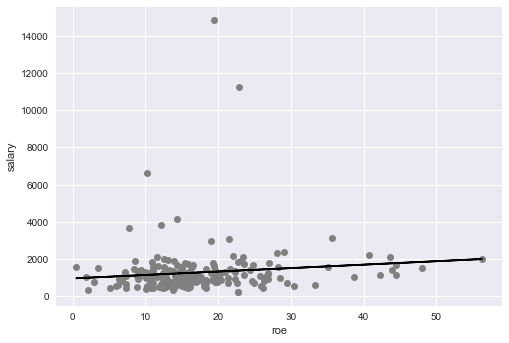

In [59]:
#comparing level-level and log-level estimates before and after dropping some outliers

import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

ceosal1 = woo.dataWoo('ceosal1')

# OLS regression:
reg = smf.ols(formula='salary ~ roe', data=ceosal1)
results = reg.fit()

# scatter plot and fitted values:
plt.plot('roe', 'salary', data=ceosal1, color='grey', marker='o', linestyle='')
plt.plot(ceosal1['roe'], results.fittedvalues, color='black', linestyle='-')
plt.ylabel('salary')
plt.xlabel('roe')

# we see that salary has a few outliers. 

In [56]:
import wooldridge as woo
import statsmodels.formula.api as smf
import numpy as np


df1 = woo.dataWoo('ceosal1')

#generate dataframe without outliers for salary
df2 = df1[df1.salary<6000]

formula = "salary ~ roe"
reg1 = smf.ols(formula, data=df1).fit()
formula = "salary ~ roe"
reg2 = smf.ols(formula, data=df2).fit()

formula = "np.log(salary) ~ roe"
reg3 = smf.ols(formula, data=df1).fit()
formula = "np.log(salary) ~ roe"
reg4 = smf.ols(formula, data=df2).fit()

dfoutput = summary_col([reg1,reg2,reg3,reg4],stars=True,float_format='%0.3f',
                  model_names=['salary outlier\n(0)','salary without outlier \n(1)','log(salary) with outlier\n(2)','log(salary) without outlier\n(3)'],
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'R2':lambda x: "{:.2f}".format(x.rsquared)})
print(dfoutput)


          salary outlier salary without outlier  log(salary) with outlier log(salary) without outlier
               (0)                 (1)                     (2)                        (3)            
-----------------------------------------------------------------------------------------------------
Intercept 963.191***     878.161***              6.712***                 6.685***                   
          (213.240)      (93.715)                (0.087)                  (0.076)                    
roe       18.501*        15.303***               0.014***                 0.014***                   
          (11.123)       (4.885)                 (0.005)                  (0.004)                    
N         209            206                     209                      206                        
R2        0.01           0.05                    0.04                     0.05                       
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


**More on Using Logarithmic Functional Forms**

- One limitation of the log is that it cannot be used if a variable takes on zero or negative values.
- In cases where a variable $y$ is nonnegative but can take on the value 0, $log(y+1)$ is sometimes used.
- The percentage change interpretations are often closely preserved, except for changes beginning at $y=0$ (where the percentage change is not even defined).
- Generally, using $log(y+1)$ and then interpreting the estimates as if the variable were $log(y)$ is acceptable when the data on $y$ contain relatively few zeros.
- Also, in some cases taking logs can actually create extreme values:
    - An example is when a variable $y$ is between zero and one (such as a proportion) and takes on values close to zero.
    - In this case, $log(y)$ (which is necessarily negative) can be very large in magnitude whereas the original variable, $y$, is bounded between zero and one.
- Also: You should not compare the $R^2$ of level and log estimations because you would compare variation in different variables!

**Models with Quadratics**

Also used quite often in applied economics:
- quadratic function
- allows to capture decreasing or increasing marginal effects.
    
    
Simple case: $y$ depends on a single observed factor $x$, but it does so in a quadratic fashion:

\begin{equation*}
y=\beta_0+\beta_1x+\beta_2x^2+u
\end{equation*}


- For example, take $y=wage$ and $x=exper$. 
- If we write the estimated equation as

\begin{equation*}
\hat{y} =\hat{\beta}_0+\hat{\beta}_1x + \hat{\beta}_2x^2
\end{equation*}

then we have the approximation

\begin{equation*}
\Delta\hat{y} \approx (\hat{\beta}_1+2\hat{\beta}_2x)\Delta x
\end{equation*}

so

\begin{equation*}
\Delta \hat{y}/\Delta x \approx\hat{\beta}_1+2\hat{\beta}_2x
\end{equation*}



**Models with Quadratics**

This says:

- the slope of the relationship between $x$ and $y$ depends on the value of $x$;

The estimated slope is $\hat{\beta}_1+2\hat{\beta}_2x$
- If we plug in $x=0$, we see that $\hat{\beta}_1$ can be interpreted as the approximate slope in going from $x=0$ to $x=1$
- After that, the second term $2\hat{\beta}_2x$ must be accounted for.
- If we are only interested in computing the predicted change in $y$ given a starting value for $x$ and a change in $x$, we could use $\hat{y} =\hat{\beta}_0+\hat{\beta}_1x + \hat{\beta}_2x^2$ directly: there is no reason to use the calculus approximation at all.
- However, we are usually more interested in quickly summarizing the effect of $x$ on $y$, and the interpretation of $\hat{\beta}_1$ and $\hat{\beta}_2$ in $\Delta \hat{y}/\Delta x \approx\hat{\beta}_1+2\hat{\beta}_2x$ provides that summary.
- Typically, we might plug in the average value of $x$ in the sample, or some other interesting values, such as the median or the lower and upper quartile values.
- In many applications, $\hat{\beta}_1$ is positive and $\hat{\beta}_2$ is negative.
- Let's check the $wage$ example for this.

- In _Python_ you can either generate the quadratic variable separately, e.g. `x_sq=x ** 2`
- Or just use `I(x ** 2)` directly in the formula.
- The `I(...)` brackets describe any parts of the formula in which we describe arithmetic transformations
- The latter version is useful to get a graphical illustration of the effect.

In [11]:
import wooldridge as woo
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

wage1 = woo.dataWoo('wage1')

wage1['exper_sq']=wage1['exper'] ** 2

wage1.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq,exper_sq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,1.131402,4,0,4
1,3.24,12,22,2,0,1,1,3,1,0,...,0,1,0,0,0,1,1.175573,484,4,484
2,3.00,11,2,0,0,0,0,2,0,0,...,1,0,0,0,0,0,1.098612,4,0,4
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,1,0,1.791759,1936,784,1936
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,1.667707,49,4,49


In [90]:
import wooldridge as woo
import statsmodels.formula.api as smf
import scipy.stats as stats

wage1 = woo.dataWoo('wage1')


#store and display results
reg = smf.ols(formula='wage ~ exper + I(exper ** 2)', data=wage1)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

#manually confirm the formulas, i.e. extract coefficients and SE
b=results.params
se=results.bse

print(f'coef:\n{b}\n')
print(f'se:\n{se}\n')

#reproduce t statistics
tstat=b/se
print(f'tstat:\n{tstat}\n')

#reproduce p-value
pval=2 * stats.t.cdf(-abs(tstat),522)
print(f'pval:\n{pval}\n')


results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     26.74
Date:                Tue, 14 Sep 2021   Prob (F-statistic):           8.77e-12
Time:                        22:07:38   Log-Likelihood:                -1407.5
No. Observations:                 526   AIC:                             2821.
Df Residuals:                     523   BIC:                             2834.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.7254  

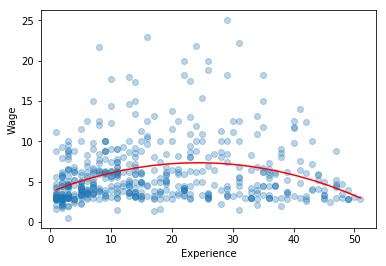

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(wage1.exper, wage1.wage, alpha=0.3)
plt.xlabel('Experience')
plt.ylabel('Wage')
exper_linspace = np.linspace(wage1.exper.min(), wage1.exper.max(), 20)
exper_linspace_sq=exper_linspace**2
est = smf.ols(formula='wage ~ exper + I(exper**2)', data=wage1).fit()
plt.plot(exper_linspace, est.params[0] + est.params[1] * exper_linspace + est.params[2] *exper_linspace_sq , 'r')



**Models with Quadratics**

- This estimated equation implies that $exper$ has a diminishing effect on wage:
    - The first year of experience is worth roughly $30 cent$ per hour (0.298)
    - The second year of experience is worth less(about 0.298-2(0.0061)(1)=0.286, or 28.6 cent)
    - In going from 10 to 11 years of experience, wage is predicted to increase by about 0.298-2(0.0061)(10)= 0.176
    - ....and so on.
    
    
- When the coefficient on $x$ is positive and the coefficient on $x^2$ is negative, the quadratic has a parabolic shape, often called _inverted U-shape_.


- There is always a positive value of $x$ where the effect of $x$ on $y$ is zero:
    - before this point, $x$ has a positive effect on $y$
    - after this point, $x$ has a negative effect on $y$.
    
    
- In practice, it can be important to know where this turning point is.
- In the estimated equation with $\hat{\beta}_1>0$ and $\hat{\beta}_2<0$, the turning point (or maximum of the function) is always achieved at the coefficient on $x$ over _twice_ the absolute value of the coefficient on $x^2$:

\begin{equation*}
x^*=|\hat{\beta}_1/2\hat{\beta}_2)|
\end{equation*}

 

**Quadratic relationship between wage and exper**

<br>  


<center><img src="figs/wool_6_1.png" width="500"/> 
    

<p>

**Models with Quadratics**

- In the wage example, $x^*=exper^*$  is $0.298/[2(0.0061)]\approx 24.4$
- The return to experience becomes zero at about 24.4 years: What should we make of this?
- There are at least three possible explanations.
    - First, it may be that few people in the sample have more than 24 years of experience, and so the part of the curve to the right of 24 can be ignored.
    - The cost of using a quadratic to capture diminishing effects is that the quadratic must eventually turn around.
    - If this point is beyond all but a small percentage of the people in the sample, then this is not of much concern.
    - But in the data set WAGE1, about 28% of the people in the sample have more than 24 years of experience; this is too high a percentage to ignore.
- It is possible that the return to exper really becomes negative at some point, but it is hard to believe that this happens at 24 years of experience.
- A more likely possibility is that the estimated effect of exper on wage is biased because we have controlled for no other factors, or because the functional relationship between wage and exper in equation is not entirely correct. 
- When a model has a dependent variable in logarithmic form and an explanatory variable entering as a quadratic, some care is needed in reporting the partial effects.
- The following example also shows that the quadratic can have a U-shape, rather than a parabolic shape (inverted U-shape). 

**Example: Effects of Pollution on Housing Prices**

<blockquote> Let's modify the housing price example to include a quadratic term in _rooms_:
    
<br>

\begin{equation*}
log(price)=\beta_0+\beta_1log(nox)+\beta_2log(dist)+\beta_3rooms+\beta_4rooms^2+u
\end{equation*}

What is the interpretation of the effect of rooms on log(price)?

In [15]:
import wooldridge as woo
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

hprice2 = woo.dataWoo('hprice2')

reg = smf.ols(
    formula='np.log(price) ~ np.log(nox)+np.log(dist)+rooms+I(rooms**2)+stratio',
    data=hprice2)
results = reg.fit()

print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     151.8
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           7.89e-98
Time:                        09:54:45   Log-Likelihood:                -31.806
No. Observations:                 506   AIC:                             75.61
Df Residuals:                     500   BIC:                             101.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.3855  

- Initially, the effect appears to be strange: Because the coefficient on rooms is negative and the coefficient on rooms$^2$ is positive, this equation literally implies that, at low values of rooms, an additional room has a negative effect on log(price).
- At some point, the effect becomes positive, and the quadratic shape means that the semi-elasticity of price with respect to rooms is increasing as rooms increases.
- We obtain the turnaround value of rooms: The absolute value of the coefficient on $rooms$, 0.545, divided by twice the coefficient on $rooms^2$, 0.062, gives $rooms^*=0.545/2(0.062)=4.4$ 
- Do we really believe that starting at three rooms and increasing to four rooms actually reduces a house’s expected value?
- Let's have a look at the data:

0.01    4.5255
0.05    5.3100
0.10    5.5900
0.25    5.8825
0.50    6.2100
0.75    6.6200
0.90    7.1500
0.99    8.3380
Name: rooms, dtype: float64

5

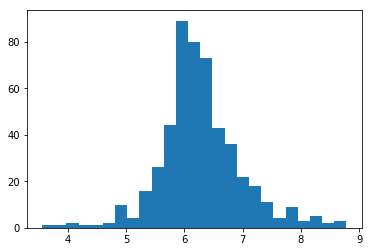

In [18]:
import wooldridge as woo
import pandas as pd
import matplotlib.pyplot as plt


hprice2 = woo.dataWoo('hprice2')


#display(hprice2.loc[hprice2['rooms']<4.4,'rooms'].describe())

# calculate quantiles for room
display(hprice2['rooms'].quantile([.01, 0.05, 0.1, .25, .5, .75, .9, .99 ]))

#display a histogram for room
plt.hist(hprice2['rooms'], bins=25)
display((hprice2['rooms']<4.4).sum())







**Models with Quadratics**

- only 5 of the 506 communities in the sample have houses averaging 4.4 rooms or less ($<$ 1% of the sample).
- Very small value: we can ignore the quadratic to the left of 4.4.
- Thus: for more representative occurences of rooms in the data the effect is increasing: for an increase from 5 to 6 rooms the price increases about .54.5+12.4(5)=7.5%, for an increase from 6 to 7 rooms, prices increase even about -54.5+12.4(6)=19.9%
- The strong increasing effect of rooms on log(price) in this example illustrates an important lesson: one cannot simply look at the coefficient on the quadratic term—in this case, .062—and declare that it is too small to bother with, based only on its magnitude.
- In many applications with quadratics the coefficient on the squared variable has one or more zeros after the decimal point: after all, this coefficient measures how the slope is changing as x (rooms) changes.
- A seemingly small coefficient can have practically important consequences, as we just saw.
- As a general rule, one must compute the partial effect and see how it varies with x to determine if the quadratic term is practically important.

**Models with Interaction Terms**

- Sometimes, it is natural for the partial effect, elasticity, or semi-elasticity of the dependent variable with respect to an explanatory variable to depend on the magnitude of yet another explanatory variable.
- For example, in the model

\begin{equation*}
price=\beta_0+\beta_1sqrft+\beta_2bdrms+\beta_3sqrft\cdot bdrms+\beta_4bthrms+u,
\end{equation*}

the partial effect of bdrms on price (holding all other variables fixed) is

\begin{equation*}
\frac{\Delta price}{\Delta bdrms}=\beta_2+\beta_3sqrft.
\end{equation*}

- If $\beta_3>0$, then this implies that an additional bedroom yields a higher increase in housing price for larger houses.
- In other words, there is an **interaction effect** between square footage and number of bedrooms.
- In summarizing the effect of bdrms on price, we must evaluate the regression at interesting values of sqrft, such as the mean value, or the lower and upper quartiles in the sample.
- Whether or not $\beta_3$ is zero is something we can easily test.
- The parameters on the original variables can be tricky to interpret when we include an interaction term.
- For example, in the previous housing price equation, $\beta_2$ is the effect of bdrms on price for a home with zero square feet, which is clearly not of much interest.
- Instead, we must be careful to put interesting values of sqrft, such as the mean or median values in the sample, into the estimated version of housing price equation.

**Computing Average Partial Effects**

- The hallmark of models with quadratics, interactions, and other nonlinear functional forms is that the partial effects depend on the values of one or more explanatory variables.
- For example, we just saw in the housing price example that the effect of bdrms depends on the value of sqrft.
- The higher flexibility afforded by such a model does have a cost: it is tricky to describe the partial effects of the explanatory variables on price with a single number.
- Often, one wants a single value to describe the relationship between the dependent variable y and each explanatory variable.
- Popular summary measure is the **average partial effect (APE)**, also called the **average marginal effect**.
- Idea behind the APE is simple: after computing the partial effect and plugging in the estimated parameters, we average the partial effects for each unit across the sample.


**Computing Average Partial Effects**


- The estimated partial effect of bdrms on price is

\begin{equation*}
\hat{\beta}_2+\hat{\beta}_3sqft
\end{equation*}

- We do not want to report this partial effect for each of houses in our sample, instead, we average these partial effects to obtain


\begin{equation*}
APE_{price}=\hat{\beta}_2+\hat{\beta}_3\bar{sqft}
\end{equation*}

where $\bar{sqft}$ is the sample average of sqft and $APE_{price}$ is the estimated APE.

- The centering of explanatory variables about their sample averages before creating quadratics or interactions forces the coefficient on the levels to be the APEs.
- However, usually we are not interested in interactions of contiuous variables but rather in interactions of a binary variable and a continuous variable or even between two binary variables. We will analyze such cases in a few minutes in detail and with data examples.

## Prediction


In models with quadratic or other nonlinear terms, the coefficients themselves are often difficult to interpret directly.
- We have to do additional calculations to obtain the partial effect at different values of the regressors or derive the extreme points.
- E.g, we found the number of rooms implying the minimum predicted house price to be around 4.4.

For a better visual understanding of the implications of our model: often useful to calculate predictions for different values of one regressor of interest while keeping the other regressors fixed at certain values like their overall sample means.
- By plotting the results against the regressor value, we get a very intuitive graph showing the estimated ceteris paribus effects of the regressor.
- For instance, assume we have model 

\begin{equation*}
y=\beta_0+\beta_1x_1+\beta_2x+...+\beta_kx_k+u
\end{equation*}

and we are interested in the expected value of $y$ given the regressors take specific values $c_1,c_2,...,c_k:$

\begin{equation*}
\theta_0=E(y|x_1=c_1,x_2=c_2,...,x_k=c_k)=\beta_0+\beta_1c_1+\beta_2c_2+...+\beta_kc_k
\end{equation*}



 **Prediction**

    
The natural point estimates are 

\begin{equation*}
\hat{\theta}_0=\hat{\beta}_0+\hat{\beta}_1c_1+\hat{\beta}_2c_2+...+\hat{\beta}_kc_k
\end{equation*}

and can readily be obtained once the parameter estimates $\hat{\beta}_0,...,\hat{\beta}_k$  are calculated.
- `statsmodels` provides the method `predict` for this.
- The method `predict` automatically calculates the $\hat{\theta}_0$s and can be called on an object created by the `fit` method.
- Its argument is a data frame containing the values of the regressorsv $c_1,...,c_x$ of the regressors $x_1,..., x_k$ with the same variable names as in the data frame used for estimation.
- It can for example be specified with `pandas` as

```python
pd.DataFrame({'x':[c1], 'x2':[c2],...,'xk':[ck]}, index=['newobservation1'])
```                                                        
where $x_1$ through $x_k$ are the variable names and $c_1$ through $c_k$ are the values which can also be specified as lists to get predictions at several values of the regressors.


**Prediction**

- Let's check this for the housing price example
- The number of rooms is varied between 4 and 8 and the other variables are set to their respective sample means for all predictions.
- The regressor values and the implied predictions are shown in a table and then plotted with their confidence bands.
- We see the minimum at a number of rooms of around 5.



results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     213.1
Date:                Wed, 15 Sep 2021   Prob (F-statistic):          2.00e-121
Time:                        10:46:42   Log-Likelihood:                -5047.4
No. Observations:                 506   AIC:                         1.011e+04
Df Residuals:                     500   BIC:                         1.013e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.204e+05  

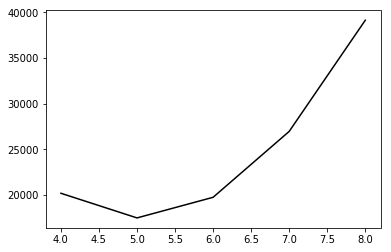

In [23]:
import wooldridge as woo
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

hprice2 = woo.dataWoo('hprice2')

# repeating the regression from before:
reg = smf.ols(
    formula='price ~ nox+dist+rooms+I(rooms**2)+stratio',
    data=hprice2)
results = reg.fit()

print(f'results.summary(): \n{results.summary()}\n')

# predictions with rooms = 4-8, all others at the sample mean:
nox_mean = np.mean(hprice2['nox'])
dist_mean = np.mean(hprice2['dist'])
stratio_mean = np.mean(hprice2['stratio'])
means = pd.DataFrame({'rooms': np.linspace(4, 8, num=5),
                  'nox': nox_mean,
                  'dist': dist_mean,
                  'stratio': stratio_mean})
print(f'means: \n{means}\n')

# point estimate of prediction (means):
pred = results.predict (means)
print (f' pred: \n{pred}\n' )

plt.plot(means['rooms'], pred, color='black',
        linestyle='-', label='')

**Prediction**

- The method `get_prediction` calculates not only $\hat{\theta}_0$ (i.e. the exact same predictions as the method `predict`), but also
    - standard errors of the predictions (column `mean_se`),
    - confidence intervals (columns `mean_ci_lower` and `mean_ci_upper`) and
    - prediction intervals (columns `obs_ci_lower` and `obs_ci_upper`).
- All you have to do is calling a second method `summary_frame` to provide the significance level.
- Let's repeat the housing price regression and create an effects plot for the number of rooms.
- Just to compare the results we use logs here
- As you see, the minimum is now at 4 instead of 5.

lpr_CI: 
        mean  mean_ci_lower  mean_ci_upper
0   9.661702       9.499811       9.823593
1   9.676940       9.610215       9.743665
2   9.816700       9.787055       9.846345
3  10.080983      10.042409      10.119557
4  10.469788      10.383361      10.556215



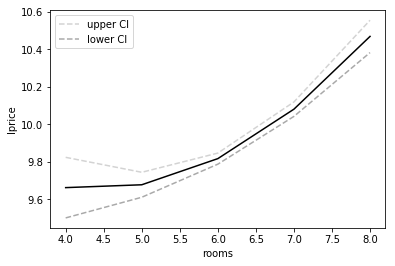

In [22]:
import wooldridge as woo
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

hprice2 = woo.dataWoo('hprice2')

# repeating the regression from Example 6.2:
reg = smf.ols(
    formula='np.log(price) ~ np.log(nox)+np.log(dist)+rooms+I(rooms**2)+stratio',
    data=hprice2)
results = reg.fit()

#print(f'results.summary(): \n{results.summary()}\n')

# predictions with rooms = 4-8, all others at the sample mean:
nox_mean = np.mean(hprice2['nox'])
dist_mean = np.mean(hprice2['dist'])
stratio_mean = np.mean(hprice2['stratio'])
X = pd.DataFrame({'rooms': np.linspace(4, 8, num=5),
                  'nox': nox_mean,
                  'dist': dist_mean,
                  'stratio': stratio_mean})
#print(f'X: \n{X}\n')

# calculate 95% confidence interval:
lpr_PICI = results.get_prediction(X).summary_frame(alpha=0.05)
lpr_CI = lpr_PICI[['mean', 'mean_ci_lower', 'mean_ci_upper']]
print(f'lpr_CI: \n{lpr_CI}\n')

# plot:
plt.plot(X['rooms'], lpr_CI['mean'], color='black',
         linestyle='-', label='')
plt.plot(X['rooms'], lpr_CI['mean_ci_upper'], color='lightgrey',
         linestyle='--', label='upper CI')
plt.plot(X['rooms'], lpr_CI['mean_ci_lower'], color='darkgrey',
         linestyle='--', label='lower CI')
plt.ylabel('lprice')
plt.xlabel('rooms')
plt.legend()

<h3>Multiple Regression Analysis with
Qualitative Regressors</h3>
    
- Many variables of interest are qualitative rather than quantitative.
- Examples include gender or race of an individual, the industry of a firm (manufacturing, retail, and so on), and the region in the United States where a city is located (South, North, West, and so on)
- We have briefly touched this topic already and will discuss it now in more detail.

**Describing Qualitative Information**

- Qualitative factors often come in the form of binary information:
    - a person is female or male
    - a person does or does not own a personal computer;
    - a firm offers a certain kind of employee pension plan or it does not;
    - a state administers capital punishment or it does not.
- In all of these examples, the relevant information can be captured by defining a **binary variable** or a **zero-one variable**.
- In econometrics, binary variables are most commonly called **dummy variables**

**Describing Qualitative Information**

- In defining a dummy variable, we must decide which event is assigned the value one and which is assigned the value zero.
- For example, in a study of individual wage determination, we might define _female_ to be a binary variable taking on the value one for females and the value zero for males.
- The name in this case indicates the event with the value one.
- The same information is captured by defining _male_ to be one if the person is male and zero if the person is female.
- Either of these is better than using _gender_ because this name does not make it clear when the dummy variable is one: does $gender=1$ correspond to male or female?
- What we call our variables is unimportant for getting regression results, but it always helps to choose names that clarify equations and expositions.
- Why do we use the values zero and one to describe qualitative information? In a sense, these values are arbitrary: any two different values would do.
- The real benefit of capturing qualitative information using zero-one variables is that it leads to regression models where the parameters have very natural interpretations, as we will see now.
- Let's check the _wage_ data and have a look at _female_, _married_ and _nonwhite_.

In [27]:
import wooldridge as woo
import statsmodels.formula.api as smf
import scipy.stats as stats

wage1 = woo.dataWoo('wage1')
display(wage1.head())
display(wage1.tail())
wage1.describe()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
521,15.00,16,14,2,0,1,1,2,0,0,...,0,0,0,1,1,0,0,2.708050,196,4
522,2.27,10,2,0,0,1,0,3,0,0,...,0,1,0,0,1,0,0,0.819780,4,0
523,4.67,15,13,18,0,0,1,3,0,0,...,0,0,0,0,1,0,0,1.541159,169,324
524,11.56,16,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2.447551,25,1
525,3.50,14,5,4,1,1,0,2,0,0,...,0,0,0,1,0,1,0,1.252763,25,16


,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
count,526.000000,526.000000,526.00000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,...,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,5.896103,12.562738,17.01711,5.104563,0.102662,0.479087,0.608365,1.043726,0.722433,0.250951,...,0.043726,0.287072,0.100760,0.258555,0.366920,0.167300,0.140684,1.623268,473.435361,78.150190
std,3.693086,2.769022,13.57216,7.224462,0.303805,0.500038,0.488580,1.261891,0.448225,0.433973,...,0.204680,0.452826,0.301298,0.438257,0.482423,0.373599,0.348027,0.531538,616.044772,199.434664
min,0.530000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.634878,1.000000,0.000000
25%,3.330000,12.000000,5.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.202972,25.000000,0.000000
50%,4.650000,12.000000,13.50000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.536867,182.500000,4.000000
75%,6.880000,14.000000,26.00000,7.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.750000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.928619,676.000000,49.000000
max,24.980000,18.000000,51.00000,44.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.218076,2601.000000,1936.000000


**A Single Dummy Independent Variable**

- How do we incorporate binary information into regression models?
- In the simplest case, with only a single dummy explanatory variable, we just add it as an independent variable in the equation.
- For example, consider the following simple model of hourly wage determination:

\begin{equation*}
wage=\beta_0+\delta_0female+\beta_1educ+u
\end{equation*}

- In this model, only two observed factors affect wage: _gender_ and _education_.
- Because _female=1_ when the person is female, and _female=0_ when the person is male, the parameter $\delta$ has the following interpretation: $\delta_0$ is the difference in hourly wage between females and males, given the same amount of education (and the same error term $u$).
- Thus, the coefficient $\delta_0$ determines whether there is discrimination against women: if $\delta_0<0$, then for the same level of other factors, women earn less than men on average.


**A Single Dummy Independent Variable**

- In terms of expectations, if we assume the zero conditional mean assumption $E(u|femal, educ)=0$, then 

\begin{equation*}
\delta_0=E(wage|female=1,edu)-E(wage|female=0, educ)
\end{equation*}

- Because $female=1$ correspnds to females and $female=0$ corresponds to males, we can write this more simply as

\begin{equation*}
\delta_0=E(wage|female,edu)-E(wage|male, educ)
\end{equation*}

- The key here is that the level of education is the same in both expectations; the difference, $\delta_0$, is due to gender only.
- The situation can be depicted graphically as an **intercept shift** between males and females.
- In the next figure the case $\delta_0<0$ is shown, so that men earn a fixed amount more per hour than women.
- The difference does not depend on the amount of education, and this explains why the wage-education profiles for women and men are parallel.



**Graph of $wage=\beta_0+\delta_0female+\beta_1educ$ for $\delta_0<0$**

<br>  


<center><img src="figs/wool_7_1.png" width="500"/> 
    

<p>

But why we do not also include a dummy variable, say male, which is one for males and zero for females?


- This would be redundant: The intercept for males is $\beta_0$, and the intercept for females is $\beta_0+\delta_0$.
- Because there are just two groups, we only need two different intercepts.
- This means that, in addition to $\beta_0$, we need to use only one dummy variable; we have chosen to include the dummy variable for females.
- Using two dummy variables would introduce perfect collinearity because _female+male=1_, which means that male is a perfect linear function of female.
- Including dummy variables for both genders is the simplest example of the so-called **dummy variable trap**, which arises when too many dummy variables describe a given number of groups.
- In the example we have chosen _males_ to be the **base group** or **benchmark group**, that is, the group against which comparisons are made.
- This is why $\beta_0$ is the intercept for males, and $\delta_0$ is the difference in intercepts between females and males.


- We could choose males as the base group by writing the model as

\begin{equation*}
wage=\alpha_0+\gamma_0male+\beta_1educ+u
\end{equation*},

where the intercept for females is $\beta_0$ and the intercept for males is $\alpha_0+\gamma_0$
- In any application, it does not matter how we choose the base group, but it is important to keep track of which group is the base group.

**Describing Qualitative Information**

- The qualitative variables in the _wage_ dataset are already coded as binary variables
- This is not always the case, sometimes they are also coded as **boolean variables** (with values `True` and `False`)
- Sometimes there are also coded as string variables 
- However, you can easily switch back and forth between data types:

In [29]:
import wooldridge as woo
import statsmodels.formula.api as smf
import scipy.stats as stats
import pandas as pd

wage1 = woo.dataWoo('wage1')

#transform female into boolean variable
wage1['female1'] = wage1['female'].astype('bool') 

#transform female back into integer variable
wage1['female2'] = wage1['female'].astype('int')

#transform female into string variable (or object as done by pandas)
wage1['female3'] = wage1['female1'].astype('str')

#replace bolean values
wage1['female4'] = wage1['female3']
wage1["female4"] = wage1["female4"].replace("True", "female")
wage1["female4"] = wage1["female4"].replace("False", "male")

#transform string variable into boolean variable
wage1['female5']= wage1['female4']=='female'


#display(wage1.head())
#display(wage1.tail())

print(wage1.dtypes)

wage        float64
educ          int64
exper         int64
tenure        int64
nonwhite      int64
female        int64
married       int64
numdep        int64
smsa          int64
northcen      int64
south         int64
west          int64
construc      int64
ndurman       int64
trcommpu      int64
trade         int64
services      int64
profserv      int64
profocc       int64
clerocc       int64
servocc       int64
lwage       float64
expersq       int64
tenursq       int64
female1        bool
female2       int32
female3      object
female4      object
female5        bool
dtype: object


**Describing Qualitative Information**

- Instead of transforming Boolean variables into dummies, they can be directly used as regressors.
- The coefficient is then named `varname[T.True]` indicating that `True` was treated as 1.

In [31]:
import wooldridge as woo
import statsmodels.formula.api as smf
import scipy.stats as stats
import pandas as pd

wage1 = woo.dataWoo('wage1')

reg = smf.ols(formula='wage ~ female + educ', data=wage1)
results = reg.fit()

print(f'results.summary(): \n{results.summary()}\n')

#transform female into boolean variable
wage1['female1'] = wage1['female'].astype('bool')

reg = smf.ols(formula='wage ~ female1 + educ', data=wage1)
results2 = reg.fit()

print(f'results2.summary(): \n{results2.summary()}\n')

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     91.32
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           9.66e-35
Time:                        11:18:43   Log-Likelihood:                -1354.3
No. Observations:                 526   AIC:                             2715.
Df Residuals:                     523   BIC:                             2727.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6228      0.673

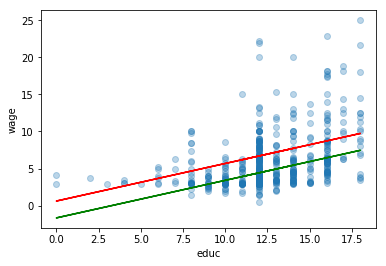

In [32]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


plt.scatter(wage1.educ, wage1.wage, alpha=0.3)
plt.xlabel('educ')
plt.ylabel('wage')
results3 = smf.ols(formula='wage ~ educ + female', data=wage1).fit()
plt.plot(wage1.educ, results3.params[0] + results3.params[1] * wage1.educ + results3.params[2] * 0, 'r')
plt.plot(wage1.educ, results3.params[0] + results3.params[1] * wage1.educ + results3.params[2] * 1, 'g')
#print(f'results3.summary(): \n{results3.summary()}\n')

**Allowing for Different Slopes**

- Notice that the two lines are parallel:
    - This is because the categorical variable affects only the intercept and not the slope (which is a function of education).

- Suppose now that we wish to test whether the return to education is the same for men and women

- How can we do this?





**Allowing for Different Slopes**

- Suppose now that we wish to test whether the return to education is the same for men and women

- We can then include an interaction term to explore the effect of an interaction between the two — i.e. we let the slope vary by gender.

    - The `*` in the formula means that we want the interaction term AND in addition each term separately (called main- or baseline-effect).
    - If you want to include just an interaction, use `:` instead.
        - This is generally avoided in analysis because it is almost always the case that, if a variable is important due to an interaction, it should have an effect by itself.
        - In the wage example for instance, it is likely that there is a constant wage differential between men and women and in addition a difference in the return to education (different slopes for return to education for men and women)

- Consider the model

\begin{equation*}
log(wage)=\beta_0+\delta_0female+\beta_1educ+\delta_1female \cdot educ+u
\end{equation*}

- To summarize what is happening here:

    - If we include the category variables without interactions we have two lines, one for `female == 1` and one for `female == 0`, with all having the same slope but different intercepts.
    - If we include the interactions, now each of the lines can have a different slope.
    - This captures the effect that variation in income may be different for people who have a good education and people who don't.



- If we plug _female_=0 into the equation, then we find that the intercept for _males_ is $\beta_0$, and the slope on
_education_ for _males_ is $\beta_1$.

- For females, we plug in _female_=1; thus, the intercept for females is $\beta_0+\delta_0$,  and the slope is $\beta_1+\delta_1$.
- Therefore, $\delta_0$ measures the difference in intercepts between women and men, and $\delta_1$ measures the difference in the return to education between women and men.


**Graphs of the wage equation with interactions of _female_ and _educ_: (a)$\delta_0<0,\delta_1<0$;  (b)$\delta_0<0,\delta_1>0$**


<br>  


<center><img src="figs/wool_7_2.png" width="500"/> 
    

<p>

**Allowing for Different Slopes**

- Graph (a) shows the case where the intercept for women is below that for men, and the slope of the line is smaller for women than for men.
- This means that women earn less than men at all levels of education, and the gap increases as educ gets larger.
- In graph (b), the intercept for women is below that for men, but the slope on education is larger for women.
- This means that women earn less than men at low levels of education, but the gap narrows as education increases.
- At some point, a woman earns more than a man with the same level of education, and this amount of education is easily found once we have the estimated equation.
- How can we estimate such a model?
- To apply OLS, we must write the model with an interaction between female and educ:

\begin{equation*}
log(wage)=(\beta_0+\delta_0female)+(\beta_1+\delta_1female)\cdot educ+u
\end{equation*}

- Basically, this allows us to test the hypothesis that average wages are identical for men and women and the hypothesis that the return to education is the same for men and women.

In [180]:
import wooldridge as woo
import statsmodels.formula.api as smf
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

wage1 = woo.dataWoo('wage1')


reg = smf.ols(formula='wage ~ female*educ', data=wage1)
results_slope=reg.fit()

print(f'results_slope.summary(): \n{results_slope.summary()}\n')

wage1['wage'].describe()

results_slope.summary(): 
                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     61.07
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           7.44e-34
Time:                        00:24:02   Log-Likelihood:                -1353.9
No. Observations:                 526   AIC:                             2716.
Df Residuals:                     522   BIC:                             2733.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2005  

count    526.000000
mean       5.896103
std        3.693086
min        0.530000
25%        3.330000
50%        4.650000
75%        6.880000
max       24.980000
Name: wage, dtype: float64

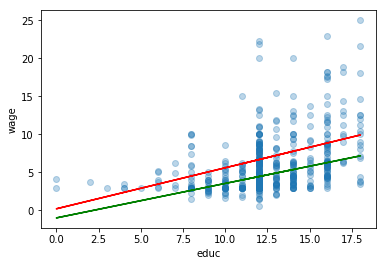

In [171]:
import wooldridge as woo
import statsmodels.formula.api as smf
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

plt.scatter(wage1.educ, wage1.wage, alpha=0.3)
plt.xlabel('educ')
plt.ylabel('wage')

plt.plot(wage1.educ, results_slope.params[0] + results_slope.params[1] * 0 + results_slope.params[2] * wage1.educ + results_slope.params[3] * 0 * wage1.educ, 'r')
plt.plot(wage1.educ, results_slope.params[0] + results_slope.params[1] * 1 + results_slope.params[2] * wage1.educ + results_slope.params[3] * 1 * wage1.educ, 'g')

**Describing Qualitative Information**

- While qualitative variables with more than two outcomes can be represented by a set of dummy variables, the more natural and convenient way to do this are categorical variables.
- In real-world data sets, qualitative information is often not readily coded as logical or dummy variables, so we might want to create our own regressors.
- Suppose a qualitative variable saved as the numpy array OS takes one of the three string values "Android", "iOS", "Windows" or "other".
- We can manually define the three relevant logical variables with "Android" as the reference category with

```python
iOS  = OS=='iOS'
wind = OS=='Windows'
oth  = OS=='other'
```


- A more convenient and elegant way to deal with qualitative variables are categorical variables discussed next.

**Categorical Variables**


- We have introduced categorical variables of type `Categorical` in the _Introduction to Python_ part earlier this week.
- They take one of a given set of outcomes which can be labeled arbitrarily.
- This makes them the natural variable type to store qualitative information.
- In a linear regression performed by `statsmodels` we can easily transform any variable into a categorical variable using the function `C` in the definition of the formula.
- The function `ols` is clever enough to implicitly add _g — 1_ dummy variables if the variable has _g_ outcomes.
- As a reference category, the first category is left out by default.


**Categorical Variables**

- Let's illustrate this using the data set `CPS1985`.
- This data set is similar to the one used in our earlier example in that it contains wage and other data for 534 individuals.
- The frequency tables for the two variables _gender_ and _occupation_ are shown in the output.
- The variable _gender_ has two categories _male_ and _female_.
- The variable _occupation_ has six categories.
- In the output, the coefficients are labeled with a combination of the variable and category name.
- As an example, the estimated coefficient of 0.224 for `C(gender) [T.male]` in `results` implies that men make about 22.4% more than women who are the same in terms of the other regressors.
- Employees in technical positions earn around 1% (see coefficient of `C(occupation)[T.technical]`) less than otherwise equal management positions (who are the reference category).
- We can choose different reference categories using a second argument of the `C` command, where we provide a new reference group `somegroup` with the command `Treatment('somegroup')`.
- In the specification `results_newref`, we choose _male_ and _technical_.
- When we rerun the same regression command, we see the expected results:
    - Variables like _education_ and _experience_ get the same coefficients.
    - The dummy variable for females gets the negative of what the males got previously.
- Obviously, it is equivalent to say "female log wages are lower by 0.224" and "male log wages are higher by 0.224".
- The coefficients for the occupation are now relative to _technical_.
- From the first regression we already knew that technical positions make 1% less than managers, so it is not surprising that in the second regression we find that managers make 1% more than technical positions.
- The other occupation coefficients are higher by 0.010085 implying the same relative comparisons as in the first specification.

freq_gender: 
col_0   count
gender       
female    245
male      289

freq_occupation: 
col_0       count
oc               
management     55
office         97
sales          38
services       83
technical     105
worker        156

table: 
                         b      se       t    pval
Intercept           0.9050  0.1717  5.2718  0.0000
C(gender)[T.male]   0.2238  0.0423  5.2979  0.0000
C(oc)[T.office]    -0.2073  0.0776 -2.6699  0.0078
C(oc)[T.sales]     -0.3601  0.0936 -3.8455  0.0001
C(oc)[T.services]  -0.3626  0.0818 -4.4305  0.0000
C(oc)[T.technical] -0.0101  0.0740 -0.1363  0.8916
C(oc)[T.worker]    -0.1525  0.0763 -1.9981  0.0462
education           0.0759  0.0101  7.5449  0.0000
experience          0.0119  0.0017  7.0895  0.0000

table_newref: 
                                                  b      se       t    pval
Intercept                                    1.1187  0.1765  6.3393  0.0000
C(gender, Treatment("male"))[T.female]      -0.2238  0.0423 -5.2979  0.0000
C(oc

**Breaking a Numeric Variable Into Categories**

- Sometimes, we do not use a numeric variable directly in a regression model because the implied linear relation seems implausible or inconvenient to interpret.
- As an alternative to working with transformations such as logs and quadratic terms, it sometimes makes sense to estimate different levels for different ranges of the variable.
- Let's consider the example of a ranking of a law school and how it relates to the starting salary of its graduates.
- Given a numeric variable, we need to generate a categorical variable to represent the range into which the rank of a school falls.
- In _Python_, the command `cut` from `pandas` is very convenient for this.
- It takes a numeric variable and a list of cut points and returns a categorical variable.
- By default, the upper cut points are included in the corresponding range.

**Example: Effects of Law School Rankings on Starting Salaries**

- The variable _rank_ of the data set `LAWSCH85` is the rank of the law school as a number between 1 and 175.
- We would like to compare schools in the top 10, ranks 11-25, 26-40, 41-60, and 61-100 to the reference group of ranks above 100. So, we store the cut points 0, 10, 25, 40, 60, 100, and 175 in a variable _cutpts_.
- In the data frame _lawsch85_, we create our new variable _rc_ using the `cut` command.
- We specify the top 10 schools as the last category.
- It is chosen with the second argument of the `C` command.
- The regression results imply that graduates from the top 10 schools collect a starting salary which is around 70% higher than those of the schools below rank 100.
- In fact: this approximation is inaccurate with these large numbers and the coefficient of 0.7 actually implies a difference of exp(0.7)-1=1.013 or 101.3%.


In [18]:
import wooldridge as woo
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

lawsch85 = woo.dataWoo('lawsch85')

# define cut points for the rank:
cutpts = [0, 10, 25, 40, 60, 100, 175]

# create categorical variable containing ranges for the rank:
lawsch85['rc'] = pd.cut(lawsch85['rank'], bins=cutpts,
                        labels=['(0,10]', '(10,25]', '(25,40]',
                                '(40,60]', '(60,100]', '(100,175]'])

# display frequencies:
freq = pd.crosstab(lawsch85['rc'], columns='count')
print(f'freq: \n{freq}\n')

# run regression:
reg = smf.ols(formula='np.log(salary) ~ C(rc, Treatment("(100,175]")) +'
                      'LSAT + GPA + np.log(libvol) + np.log(cost)',
              data=lawsch85)
results = reg.fit()

# print regression table:
table_reg = pd.DataFrame({'b': round(results.params, 4),
                          'se': round(results.bse, 4),
                          't': round(results.tvalues, 4),
                          'pval': round(results.pvalues, 4)})
print(f'table_reg: \n{table_reg}\n')

freq: 
col_0      count
rc              
(0,10]        10
(10,25]       16
(25,40]       13
(40,60]       18
(60,100]      37
(100,175]     62

table_reg: 
                                                b      se        t    pval
Intercept                                  9.1653  0.4114  22.2770  0.0000
C(rc, Treatment("(100,175]"))[T.(0,10]]    0.6996  0.0535  13.0780  0.0000
C(rc, Treatment("(100,175]"))[T.(10,25]]   0.5935  0.0394  15.0493  0.0000
C(rc, Treatment("(100,175]"))[T.(25,40]]   0.3751  0.0341  11.0054  0.0000
C(rc, Treatment("(100,175]"))[T.(40,60]]   0.2628  0.0280   9.3991  0.0000
C(rc, Treatment("(100,175]"))[T.(60,100]]  0.1316  0.0210   6.2540  0.0000
LSAT                                       0.0057  0.0031   1.8579  0.0655
GPA                                        0.0137  0.0742   0.1850  0.8535
np.log(libvol)                             0.0364  0.0260   1.3976  0.1647
np.log(cost)                               0.0008  0.0251   0.0335  0.9734



**Interactions and Differences in Regression Functions Across
Groups**

- Dummy and categorical variables can be interacted just like any other variable.
- Let's now add an interaction term between _female_ and _married_
- This allows a marriage premium to depend on gender.
- This model also allows us to obtain the estimated wage differential among all four groups, but here we must be careful to plug in the correct combination of zeros and ones.
- Setting $female=0$ and $married=0$ corresponds to the group single men, which is the base group, since this eliminates $female$, $married$, and $female\cdot married$.
- We can find the intercept for married men by setting $female=0$ and $married=1$ for instance.


In [35]:
import wooldridge as woo
import statsmodels.formula.api as smf
import scipy.stats as stats
import pandas as pd
import numpy as np

wage1 = woo.dataWoo('wage1')

reg = smf.ols(formula='np.log(wage) ~ female*married + educ + exper + tenure', data=wage1)
results = reg.fit()

print(f'results.summary(): \n{results.summary()}\n')

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     63.63
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           4.53e-59
Time:                        14:02:08   Log-Likelihood:                -268.44
No. Observations:                 526   AIC:                             550.9
Df Residuals:                     519   BIC:                             580.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.387